In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:
    def __init__(self,
                 epochs=100,
                 lr=0.1,
                 regularization=None,
                 lambda_=1,
                 use_bias=True):
        """Linear Regression

        Args:
            epochs (int, optional): Epochs. Defaults to 100.
            lr (float, optional): Learning Rate. Defaults to 0.1.
            regularization (String, optional): [None, 'L1', 'L2']. Defaults to None.
            lambda_ (int, optional): Regularization coefficient. Defaults to 1.
            use_bias (bool, optional): Bias Term. Defaults to True.
        """
        self.epochs = epochs
        self.weights = None
        self.bias = 0
        self.lr = lr
        self.regularization = regularization
        self.lambda_ = lambda_
        self.use_bias = use_bias
        self.n_features = 0
        
    def _compute_loss(self, y_true, y_pred):
        # loss = (1/2n)* Σ(y_true-y_pred)**2
        loss = np.sum(np.square(y_true-y_pred))/(2*len(y_true))
        if self.regularization == 'L1':
            # loss += λ * Σ|W|
            loss += self.lambda_*np.sum(np.abs(self.weights))
        elif self.regularization == 'L2':
            # loss += λ * Σ(W)**2
            loss += self.lambda_*np.sum(np.square(self.weights))
        return loss
    
    def _compute_derivate_w(self, X, y_true, y_pred):
        # derivative w.r.t w = (1/n) * (y_true-y_pred) * (X)
        derivative = (np.dot(X.T, (y_true-y_pred)))/len(y_true)
        if self.regularization == 'L1':
            # derivative += λ * (1) if W > 0
            #               λ * (-1) if W < 0
            derivative += self.lambda_*(np.where(self.weights>0, 1, -1))
        elif self.regularization == 'L2':
            # derivative += 2 * λ * W
            derivative += 2*self.lambda_*self.weights
        return derivative
        
    def _compute_dervative_b(self, y_true, y_pred):
        # derivative w.r.t to b = (1/n) * (y_true - y_pred)
        return np.sum(y_true-y_pred)/(len(y_true))
    
    def _plot_loss(self, losses):
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.plot(range(self.epochs), losses, 'm', linewidth="5")
        plt.show()

    def fit(self, X, y, verbose=False, plot_loss=False):
        """Fit

        Args:
            X : Features
            y : Target
            verbose (bool, optional): controls logging. Defaults to False.
            plot_loss (bool, optional): Plots loss vs epochs if true. Defaults to False.
        """
        assert X.shape[0] == len(y), "Number of rows in X, y doesn't match"
        
        self.n_features = X.shape[1]
        self.weights = np.random.randn(self.n_features)
        losses = []
        
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = self._compute_loss(y, y_pred)
            losses.append(loss)
            grad_w = self._compute_derivate_w(X, y, y_pred)
            self.weights += self.lr*grad_w
            if self.use_bias:
                grad_b = self._compute_dervative_b(y, y_pred)
                self.bias += self.lr*grad_b
            if verbose:
                print(f"Epoch: {epoch} Loss: {loss}")
            
        if plot_loss:
            self._plot_loss(losses)
    
    def predict(self, X):
        """Predict

        Args:
            X : Features

        Returns:
            np.array : Predictions
        """
        assert X.shape[1] == self.n_features, \
                f"Expected {self.n_features} features but got {X.shape[1]}"
        
        return np.dot(X, self.weights)+self.bias

    def plot_predictions(self, X, y, title):
        """Plot predictions

        Args:
            X : Features
            y : Target
            title : Plot title
        """
        plt.plot(X, self.predict(X), c='r')
        plt.scatter(X, y, c='g')
        plt.title(title)
        plt.show()

In [4]:
# Generate data
X, y = make_regression(n_samples=300, n_features=1, bias=20, noise=4)
print(X.shape, y.shape)

(300, 1) (300,)


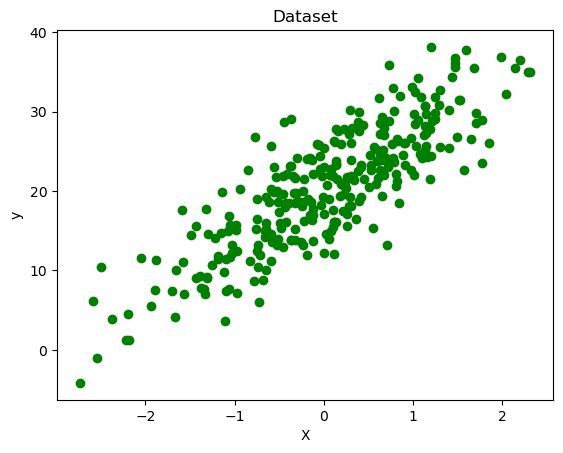

In [5]:
plt.scatter(X, y, color='green')
plt.xlabel("X")
plt.ylabel('y')
plt.title('Dataset')
plt.show()

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                test_size=0.2,
                                                shuffle=True,
                                                random_state=35)
print(X_train.shape, X_val.shape)

(240, 1) (60, 1)


### Mean Model

In [7]:
from sklearn.metrics import mean_squared_error

train_pred = [y_train.mean() for _ in range(len(y_train))]
print("Train mse: ", mean_squared_error(y_train, train_pred))

val_pred = [y_train.mean() for _ in range(len(y_val))]
print("Val mse: ", mean_squared_error(y_val, val_pred))

Train mse:  57.352826831780085
Val mse:  72.43455339045832


### Linear Regression

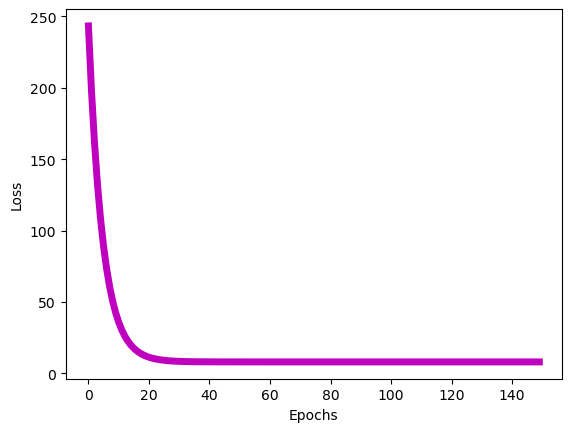

In [8]:
model = LinearRegression(epochs=150)
model.fit(X_train, y_train, verbose=False, plot_loss=True)

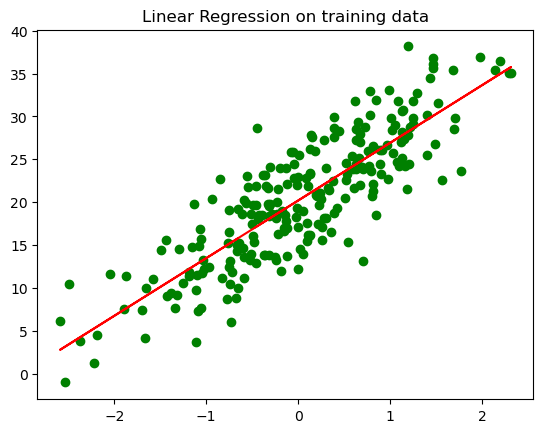

In [9]:
model.plot_predictions(X_train, y_train, "Linear Regression on training data")

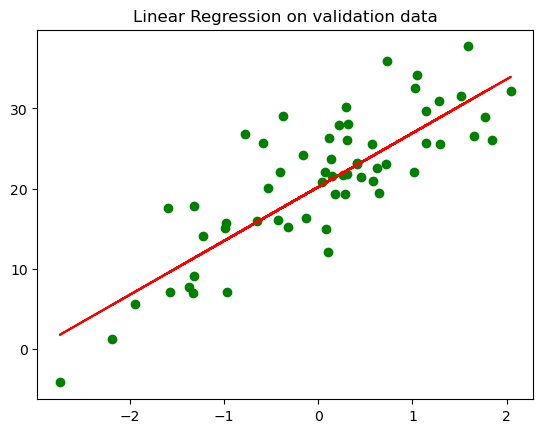

In [10]:
model.plot_predictions(X_val, y_val, "Linear Regression on validation data")

In [11]:
print("Train mse: ", mean_squared_error(y_train, model.predict(X_train)))
print("Val mse: ", mean_squared_error(y_val, model.predict(X_val)))

Train mse:  16.083194199120847
Val mse:  23.69474909506064


### Lasso Regression

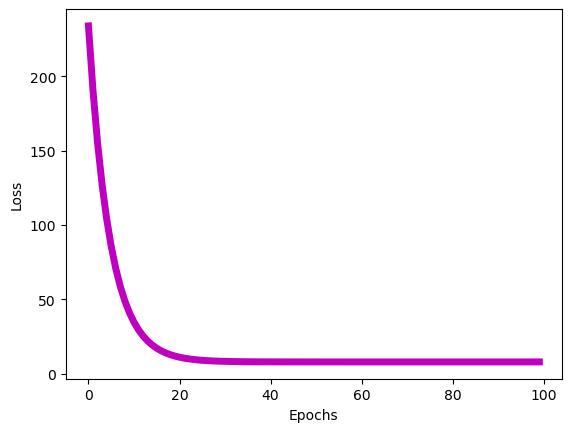

In [12]:
model = LinearRegression(epochs=100, regularization='L1', lambda_=0.001)
model.fit(X_train, y_train, verbose=False, plot_loss=True)

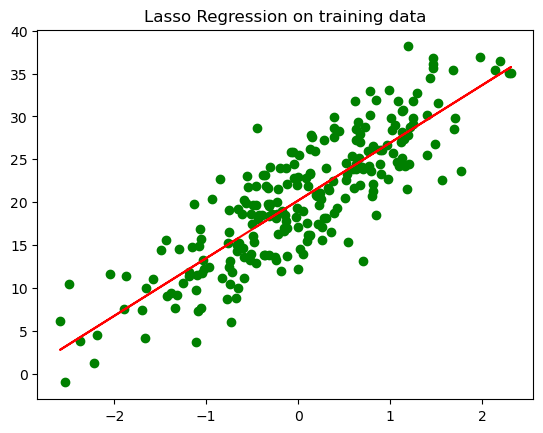

In [13]:
model.plot_predictions(X_train, y_train, "Lasso Regression on training data")

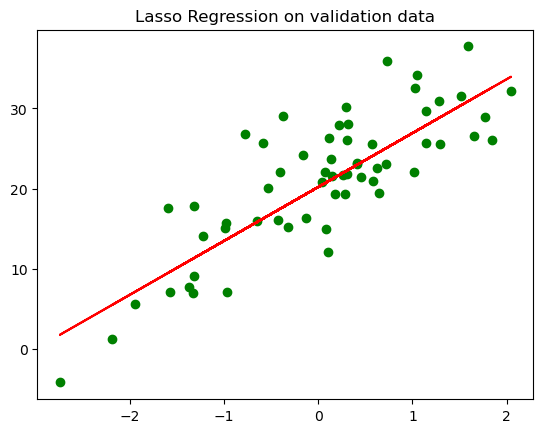

In [14]:
model.plot_predictions(X_val, y_val, "Lasso Regression on validation data")

In [15]:
print("Train mse: ", mean_squared_error(y_train, model.predict(X_train)))
print("Val mse: ", mean_squared_error(y_val, model.predict(X_val)))

Train mse:  16.083195361426434
Val mse:  23.695504718839718


### Ridge Regression

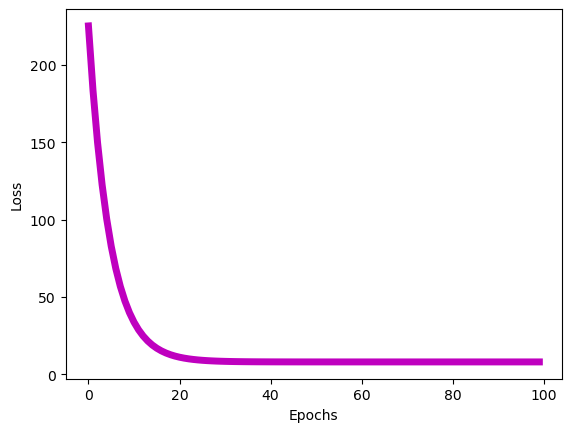

In [17]:
model = LinearRegression(epochs=100, regularization='L2', lambda_=0.001)
model.fit(X_train, y_train, verbose=False, plot_loss=True)

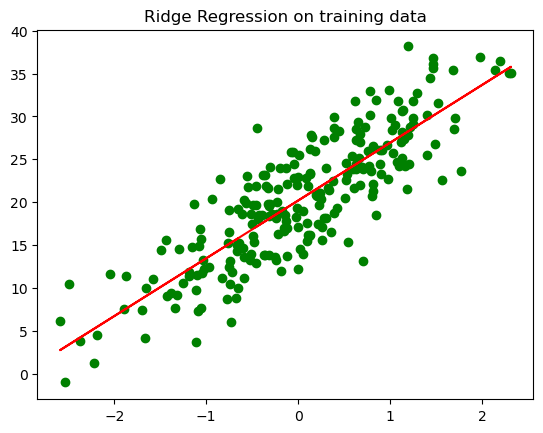

In [18]:
model.plot_predictions(X_train, y_train, "Ridge Regression on training data")

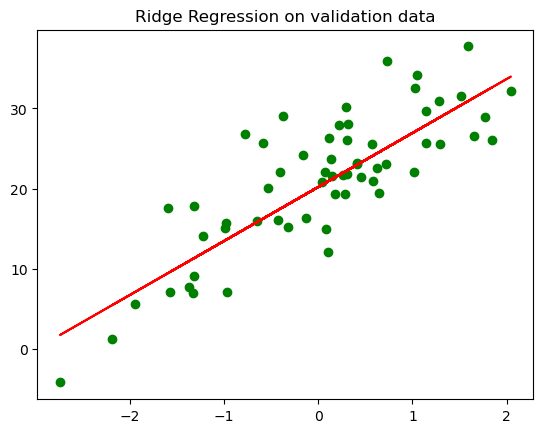

In [19]:
model.plot_predictions(X_val, y_val, "Ridge Regression on validation data")

In [20]:
print("Train mse: ", mean_squared_error(y_train, model.predict(X_train)))
print("Val mse: ", mean_squared_error(y_val, model.predict(X_val)))

Train mse:  16.083394010701173
Val mse:  23.697572268072033


### Scikit-Learn API

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Train mse: ", mean_squared_error(y_train, model.predict(X_train)))
print("Val mse: ", mean_squared_error(y_val, model.predict(X_val)))

Train mse:  16.08319419911506
Val mse:  23.694746382887118
